## Homework 4
S. Kaan Cetindag

### 1)Finding Coin is Fair or Fake

Given coin prior is 

\begin{equation*}
p(m)=0.5\beta(20,3)+0.5\beta(3,20)\\
p(m)=0.5(\beta(20,3)+\beta(3,20))
\end{equation*}

provided this we have:

\begin{align*}
fair &\implies \pi_1|m=0.5\\
fake &\implies \pi_1|m=0.5(\beta(20,3)+\beta(3,20))
\end{align*}

**Fair $m=0$**

\begin{align*}
p(X|m=0)&=\int d\pi_1p(X|\pi_1)p(\pi_1|m=0)\\
&=\frac{1}{2^{c_1}}\frac{1}{2^{c_0}}=\frac{1}{2^N}
\end{align*}

**Fake $m=1$**

\begin{align*}
p(X|m=1)&=\int d\pi_1p(X|\pi_1)p(\pi_1|m=1)\\
&=\frac{1}{2}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\left[\int d\pi_1\pi_1^{c_1}(1-\pi_1)^{c_0}\left(\pi_1^{a_1-1}(1-\pi_1)^{b_1-1}+\pi_1^{b_2-1}(1-\pi_1)^{a_2-1}\right)\right]\\
&=\frac{1}{2}\left(\frac{\Gamma(a_1+b_1)}{\Gamma(a_1)\Gamma(b_1)}\frac{\Gamma(a_1+c_1)\Gamma(b_1+c_0)}{\Gamma(a_1+b_1+c_1+c_0)}+\frac{\Gamma(a_2+b_2)}{\Gamma(a_2)\Gamma(b_2)}\frac{\Gamma(b_2+c_1)\Gamma(a_2+c_0)}{\Gamma(a_2+b_2+c_1+c_0)}\right)
\end{align*}

We can find the log likelihood of the coin being fair or fake by:

$$l(X)=\frac{p(X|m=0)}{p(X|m=1)}=\log p(X|m=0)-\log p(X|m=1)$$

if $l(X)>0$ then the coin is more likely to be fair and fake if $l(X)<0$.


In [1]:
#Beta parameters
a1=20
a2=3
b1=20
b2=3
# Number of Zeros observed
c0 = 1
# Number of Ones
c1 = 6

In [2]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

def log_odds(c0, c1, a1, b1, a2, b2):
    # Total number of tosses
    N = c0 + c1
    
    M_fair = N*np.log(0.5)
    M_fake = np.log(0.5*((sps.gamma(a1+b1)/(sps.gamma(a1)*sps.gamma(b1)))*((sps.gamma(a1+c1)*sps.gamma(b1+c0))/sps.gamma(a1+b1+c0+c1))
    +(sps.gamma(a2+b2)/(sps.gamma(a2)*sps.gamma(b2)))*((sps.gamma(b2+c1)*sps.gamma(a2+c0))/sps.gamma(a2+b2+c1+c0))))
    return M_fair - M_fake

print log_odds(c0, c1, a1, b1, a2, b2)

-0.454081464033


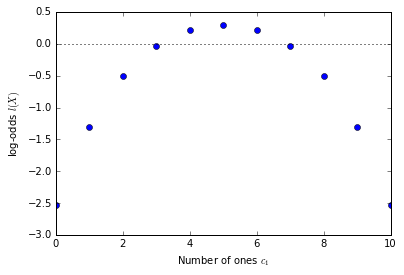

In [3]:
N=10
l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

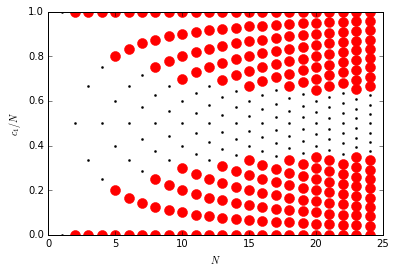

In [4]:
for N in range(1, 25):
    l = np.zeros(N+1)
    
    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2)
        
    idx = np.where(np.array(l)<0)
    p = np.arange(0,N+1)/float(N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

### 2) Booklet Q74

The model of the data is:

\begin{align*}
\pi_1 &\sim\mathcal{B}(1,1)\\
\pi_2 &\sim \mathcal{B}(1,1)\\
x_t &\sim \begin{cases} \mathcal{BE}(x_t;\pi_1),\hspace{0.3cm}t< n\\
\mathcal{BE}(x_t;\pi_2),\hspace{0.3cm}t\geq n\end{cases}
\end{align*}

It is also given that $n$ has an uniform distribution leading to $p(n=i)=\frac{1}{T}$

\begin{align*}
p(n=i|X)=\frac{p(n,X)}{p(X)}
\end{align*}
The model can be drawn as following:

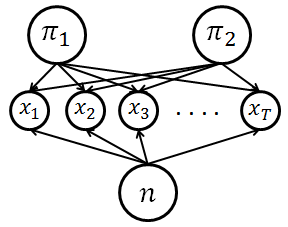

In [6]:
from IPython.display import Image
Image(filename='model.png') 

From this we can get:
\begin{align*}
X=\underbrace{x_1,x_2,...,x_{k-1}}_{\text{$k$ subset}}\underbrace{x_k,x_{k+1},...,x_T}_{\text{$l$ subset}}
\end{align*}
where $k$ and $l$ subsets are seperated by the changepoint,

\begin{align*}
p(X|n=i,\pi_1,\pi_2)&=\prod_{t=1}^{T}\pi_1^{x_t[t< i]}(1-\pi_1)^{(1-x_t)[t< i]}\pi_2^{x_t[t\geq i]}(1-\pi_2)^{(1-x_t)[t\geq i]}\
=\prod_{t=1}^{i-1}\pi_1^{x_t}(1-\pi_1)^{(1-x_t)}\prod_{t=i}^{T}\pi_2^{x_t}(1-\pi_2)^{(1-x_t)}\\
&=\pi_1^{c_{k1}}(1-\pi_1)^{c_{k0}}\pi_2^{c_{l1}}(1-\pi_2)^{c_{l0}}
\end{align*}

$c_{k0}, c_{k1}, c_{l0}$ and $c_{l1}$ are corresponding 1 and 0 counts for subsets.

\begin{align*}
p(n=i,X)&=\int\int d\pi_1d\pi_2p(X|\pi_1,\pi_2,n)p(\pi_1)p(\pi_2)p(n=i)\\
&=\frac{1}{50}\int\int d\pi_1d\pi_2p(X|\pi_1,\pi_2,n)\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\pi_1^{a-1}
\end{align*}
plugging in $p(X|n=i,\pi_1,\pi_2)$ and taking the integral we get:

\begin{align*}
p(X,n=i)=\frac{1}{50}\left(\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\right)^2\frac{\Gamma(a+c_{k1})\Gamma(b+c_{k0})}{\Gamma(a+b+c_{k0}+c_{k1})}\frac{\Gamma(a+c_{l1})\Gamma(b+c_{l0})}{\Gamma(a+b+c_{l0}+c_{l1})}\
\end{align*}

We can finally get the conditional probability by simply normalizing the above probability.

\begin{align*}
p(n=i|X)=\frac{p(X,n=i)}{\sum_{n}p(X,n)}
\end{align*}



In [40]:
sequence=[0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]

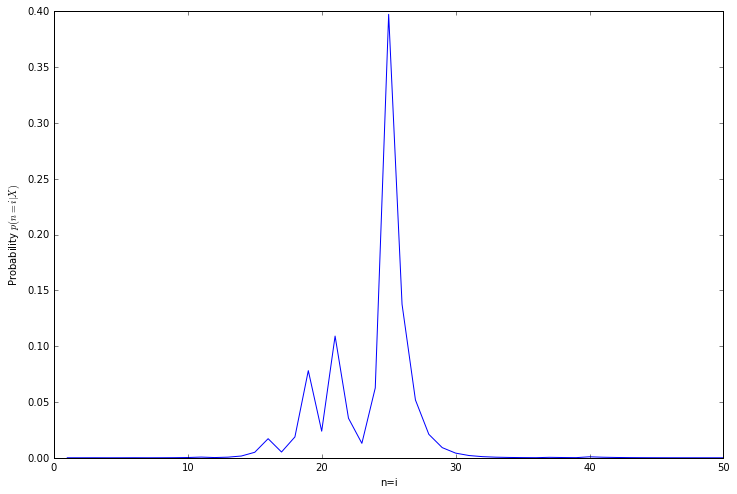

In [56]:
def findChange(a,b,seq):
    
    #constant part
    const=(1/float(50))*(sps.gamma(a+b)/(sps.gamma(a)*sps.gamma(b)))**2
    prob_arr=[]
    for n in range(len(seq)):
        #finding the 1 and zero counts for both subsets
        ck0=len(np.where(np.asarray(sequence[:n]) == 0)[0])
        ck1=len(np.where(np.asarray(sequence[:n]) == 1)[0])
        cl0=len(np.where(np.asarray(sequence[n:]) == 0)[0])
        cl1=len(np.where(np.asarray(sequence[n:]) == 1)[0])
        
        prob=((sps.gamma(a+ck1)*sps.gamma(b+ck0))/sps.gamma(a+b+ck0+ck1))*((sps.gamma(a+cl1)*sps.gamma(b+cl0))/sps.gamma(a+b+cl0+cl1))
        prob_arr.append(const*prob)
        
    prob_final=prob_arr/sum(prob_arr)
    return prob_final
plotprob=findChange(1,1,sequence)
xx=np.arange(1,len(sequence)+1)
plt.figure(figsize=(12,8))
plt.plot(xx,plotprob)
plt.xlabel('n=i')
plt.ylabel('Probability $p(n=i|X)$')
plt.show()